In [ ]:
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
mnist = datasets.MNIST(root='./data', download=True, transform=None)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
len(mnist)

60000

In [ ]:
mnist[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FF3A57D34D0>, 5)

# Plotting the images for mnist datasets

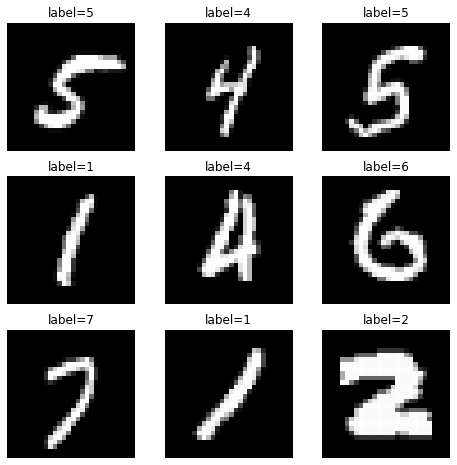

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist), size=(1,)).item()
    img, label = mnist[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f'label={label}')
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

## Generating second dataset of random numbers from 0 to 9
Curently considering length of dataset same as that of length of mnist dataset

In [ ]:
num = np.random.randint(low=0, high=10, size=len(mnist))
X1 = np.zeros((num.size, num.max()+1))
X1 [np.arange(num.size),num] = 1
print(f"Printing the output labels: {num}")
print(f"Printing the onehot encoded numbers Input: {X1}")

Printing the output labels: [4 7 8 ... 2 9 7]
Printing the onehot encoded numbers Input: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
class Dataset_prep(Dataset):
    
    # reading the csv and defining predictor and output columns
    def __init__(self, X1, num, mnist):
        self.X1 = X1,
        self.mnist = mnist
        self.num = num
    
    # number of rows in dataset [Considering length of mnist right now]
    def __len__(self):
        return len(self.mnist)
    
    # get a row at an index
    def __getitem__(self, index):
        image = ToTensor()(self.mnist[index][0]) # Transforming to tensor
        number = torch.from_numpy(self.X1[index][0])
        label1 = torch.tensor([self.mnist[index][1]])
        label2 = self.mnist[index][1] + self.num[index]
        label2 = torch.tensor([label2])
        return {'image':image,'number':number,'label1':label1,'label2':label2}

In [ ]:
dataset = Dataset_prep(X1, num, mnist)
train_set, val_set = torch.utils.data.random_split(dataset, [50000, 10000])

In [ ]:
val_set.dataset[0]['label1']

tensor([5])

In [ ]:
train_dataloader = DataLoader(train_set.dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(val_set.dataset, batch_size=64, shuffle=True)

In [ ]:
dir(train_dataloader)
train_dataloader.dataset[0]

{'image': tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000,

In [ ]:
train_dataloader.dataset[0]['number'].shape

torch.Size([10])

In [ ]:
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Input for Image: CNN based
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.FC11 = nn.Linear(32*7*7, 64)
          
        #Input for Model
        self.layer_1 = nn.Linear(10, 32)
        self.layer_2 = nn.Linear(32, 64)
        self.layer_3 = nn.Linear(64, 128)
        self.layer_4 = nn.Linear(128, 64)
        
        self.out2 = nn.Linear(128, 18) 
        self.out1 = nn.Linear(128, 10)

    def forward(self, x1, x2):
        x1 = x1.reshape(-1, 1, 28, 28)
        x1 = F.max_pool2d(F.relu(self.conv1(x1)),(2,2))
        x1 = F.max_pool2d(F.relu(self.conv2(x1)),(2,2))
        # print(f'x1.shape_after_conv:{x1.shape}')
        x1 = x1.reshape(-1, 32*7*7)
        # print(f'new: {x1.shape}')
        x1 = self.FC11(x1)
        # print(f'newfc: {x1.shape}')
        # x2 = x2.view(-1, x2.size(0)).float()
        x2 = x2.reshape(1, 10)
        # print(f'x2: {x2.shape}')
        x2 = F.relu(self.layer_1(x2.float()))
        # print(f'x2.shape{x2.shape}')
        x2 = F.relu(self.layer_2(x2))
        # print(f'x2.shape{x2.shape}')
        x2 = F.relu(self.layer_3(x2))
        x2 = F.relu(self.layer_4(x2))
        
        #x1 = x1.reshape(x1.size(0), -1)
        # print(f'new1: {x1.shape}')
        #x2 = x2.view(x2.size(0), -1)
        # print(f'new2: {x2.shape}')
        
        x = torch.cat((x1, x2), dim=1)
        # print(f'x: {x.shape}')
        out1 = self.out1(x)
        out2 = self.out2(x)
        # print(f'out1: {out1.shape}')
        # out1 = out1.view(-1, out1.size(0))
        # print(f'out1: {out1.shape}')
        # out2 = out2.view(-1, out2.size(0))
        # print(f'out2: {out2.shape}')       
        return {'label1':out1, 'label2':out2}



In [ ]:
model = Model()
opt = optim.SGD(model.parameters(), lr=10E-3)

print(model)

Model(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (FC11): Linear(in_features=1568, out_features=64, bias=True)
  (layer_1): Linear(in_features=10, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=128, bias=True)
  (layer_4): Linear(in_features=128, out_features=64, bias=True)
  (out2): Linear(in_features=128, out_features=18, bias=True)
  (out1): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.CrossEntropyLoss()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
num_epochs = 25

def train_model(num_epochs, model, criterion1, criterion2, optimizer):
    valid_loss_min = np.Inf
    for epoch in range(1, num_epochs):
        train_loss = 0.0
        valid_loss = 0.0
        # train the model #
        model.train()
        for batch_idx, batch in enumerate(train_dataloader.dataset):

            # importing data and moving to GPU
            image = batch['image'].to(device)
            # print(image)
            number = batch['number'].to(device)
            # print(number)
            # print(number.shape)
            label1 = batch['label1'].to(device)
            label2 = batch['label2'].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()
            output=model(image, number)
            label1_hat=output['label1']
            label2_hat=output['label2']
            # print(f' y: {label1}')

            # print(f'y_hat:{label1_hat}') 
            #print(label1.shape) 
            #print(label1_hat.shape)

                 
            # calculate loss
            loss1=criterion1(label1_hat, label1)
            # loss1=criterion1(label1_hat, label1)
            loss2=criterion2(label2_hat, label2)
                
            loss=loss1+loss2
            
            # back prop
            loss.backward()
            # grad
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            if batch_idx % 50 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
        # validate the model #
        model.eval()
        for batch_idx, batch in enumerate(test_dataloader.dataset):
            image = batch['image'].to(device)
            # print(image)
            number = batch['number'].to(device)
            label1 = batch['label1'].to(device)
            label2 = batch['label2'].to(device)
            # print(label1)
            # print(label1.squeeze().type(torch.LongTensor))
            output= model(image, number)
            label1_hat=output['label1']
            label2_hat=output['label2']
            # print(label1_hat) 
            # print(label1_hat.shape)
          
            # calculate loss
            loss1=criterion1(label1_hat, label1)
            loss2=criterion2(label2_hat, label2)
 
            loss=loss1+loss2
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        
        # print training/validation statistics 
        print(f'Epoch: {epoch} \tTraining Loss: {train_loss:.6f} \tValidation Loss: {valid_loss:.6f}')
        
    # return trained model
    return model

In [ ]:
model_out = train_model(num_epochs, model, criterion1, criterion2, opt)

Epoch 1, Batch 1 loss: 5.061295
Epoch: 1 	Training Loss: 5.061295 	Validation Loss: 4.959952
Epoch 2, Batch 1 loss: 4.959952
Epoch: 2 	Training Loss: 4.959952 	Validation Loss: 4.853763
Epoch 3, Batch 1 loss: 4.853763
Epoch: 3 	Training Loss: 4.853763 	Validation Loss: 4.736936
Epoch 4, Batch 1 loss: 4.736936
Epoch: 4 	Training Loss: 4.736936 	Validation Loss: 4.601780
Epoch 5, Batch 1 loss: 4.601780
Epoch: 5 	Training Loss: 4.601780 	Validation Loss: 4.439245
Epoch 6, Batch 1 loss: 4.439245
Epoch: 6 	Training Loss: 4.439245 	Validation Loss: 4.234790
Epoch 7, Batch 1 loss: 4.234790
Epoch: 7 	Training Loss: 4.234790 	Validation Loss: 3.967806
Epoch 8, Batch 1 loss: 3.967806
Epoch: 8 	Training Loss: 3.967806 	Validation Loss: 3.606793
Epoch 9, Batch 1 loss: 3.606793
Epoch: 9 	Training Loss: 3.606793 	Validation Loss: 3.106458
Epoch 10, Batch 1 loss: 3.106458
Epoch: 10 	Training Loss: 3.106458 	Validation Loss: 2.419562
Epoch 11, Batch 1 loss: 2.419562
Epoch: 11 	Training Loss: 2.419562 

In [ ]:

prediction = model(train_dataloader.dataset[0]['image'], train_dataloader.dataset[0]['number'])

In [ ]:
prediction

{'label1': tensor([[-0.2797, -0.4143, -0.0636, -1.2225, -0.5887,  5.7604, -0.7597, -0.7989,
          -1.5732, -0.7878]], grad_fn=<AddmmBackward>),
 'label2': tensor([[-9.2969e-01, -3.9537e-01, -3.3587e-01, -1.1584e-01, -7.9080e-01,
          -8.9534e-01,  2.0855e-02, -1.0660e-01,  3.3536e-02,  7.0658e+00,
           4.3657e-01, -2.0598e-01, -7.3364e-01, -1.4730e-02, -5.6693e-01,
          -3.5712e-02, -4.2591e-01,  4.4367e-03]], grad_fn=<AddmmBackward>)}

In [ ]:
np.argmax(prediction['label1'].detach().numpy())

5

In [ ]:
np.argmax(prediction['label2'].detach().numpy())

9